#### importing libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
%matplotlib inline

#### data frame

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### shape

In [3]:
df.shape

(301, 9)

#### unique values of categorical

In [5]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


#### null values

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### descriptive statistics

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### final dataset

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### feature engineering

In [12]:
final_df['Current_year'] = 2022

In [13]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [14]:
final_df['no_year'] = final_df['Current_year'] - final_df['Year']

In [15]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


#### dropping redundant columns

In [16]:
final_df.drop(['Year', 'Current_year'],axis = 1, inplace = True)

In [17]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


#### encoding

In [18]:
final_df = pd.get_dummies(final_df, drop_first = True) # drop_first is to avoid dummy variable trap

In [19]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [21]:
#### correlation

In [22]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


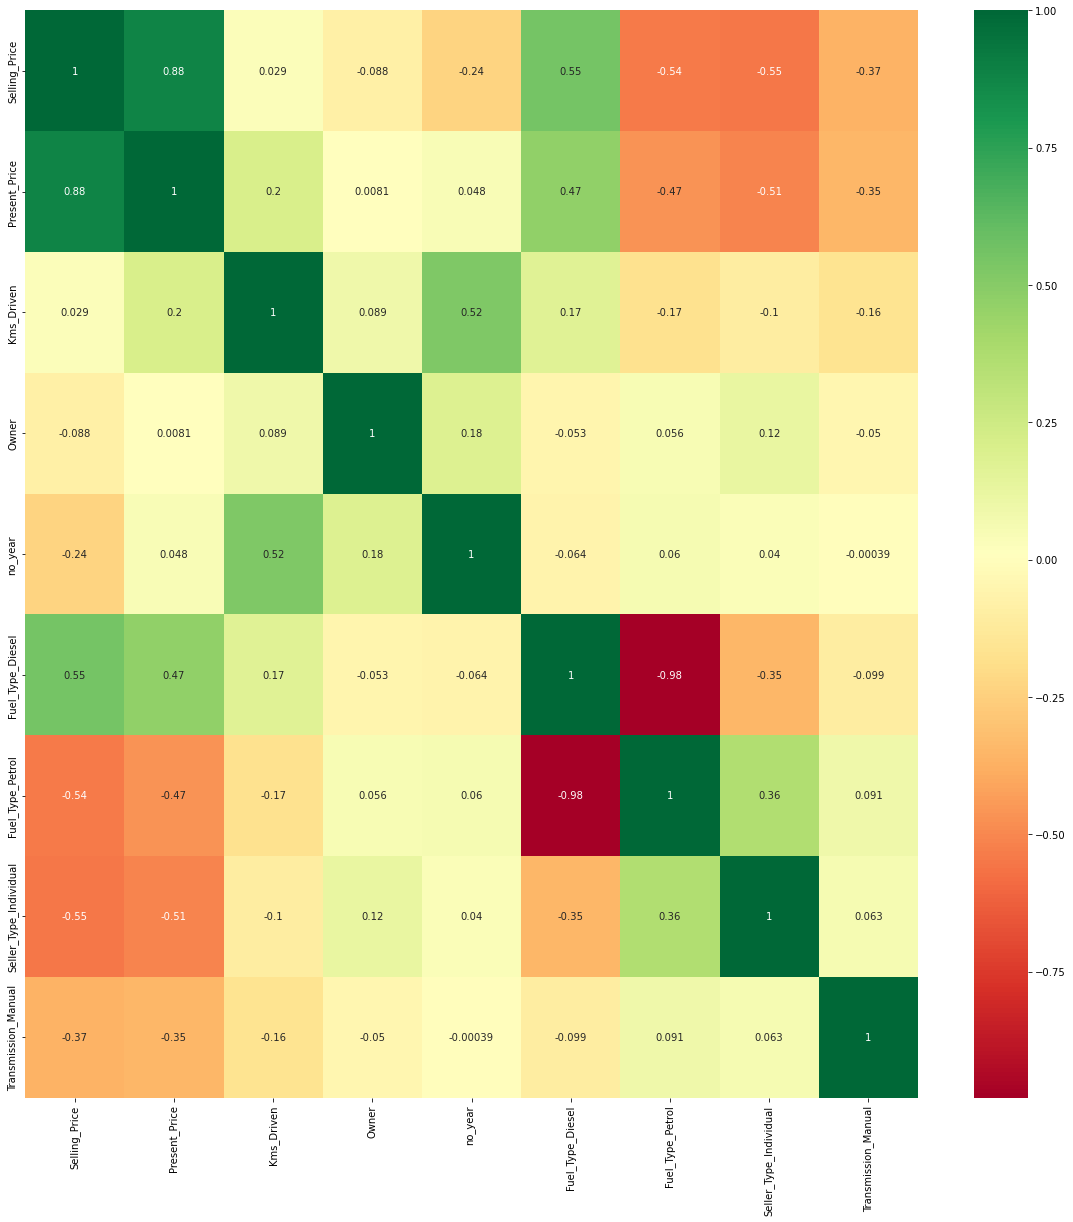

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(final_df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

#### independent and dependent features

In [29]:
x = final_df.iloc[:, 1:]
y = final_df.iloc[:,0]

In [30]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [31]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

#### feature importance

In [32]:
from sklearn.ensemble import ExtraTreesRegressor

In [33]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [34]:
#### visualisation
feature_importance = pd.Series(model.feature_importances_, index = x.columns)

<AxesSubplot:>

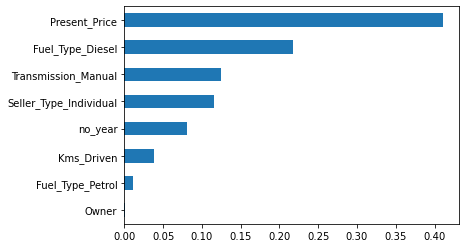

In [41]:
feature_importance.sort_values().plot(kind = 'barh')

#### train test split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state=0)

In [44]:
xtrain.shape, ytrain.shape

((210, 8), (210,))

In [45]:
# scaling is not required in decision tree like algorithms

#### Random Forest model

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
regressor = RandomForestRegressor()

In [48]:
n_estimators = [int(x) for x in np.linspace(start=100, stop = 1200, num = 12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

#### hyperparameter tuning

In [50]:


 #Randomized Search CV

# Number of trees in random forest 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] #1
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] #2
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)] #3
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100] #4
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10] #5



In [52]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
rf_model = RandomizedSearchCV(estimator=regressor, 
                              param_distributions=random_grid, scoring = 'neg_mean_squared_error', 
                              cv = 5, verbose = 3,random_state=0)

In [57]:
rf_model.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-1.829 total time=   0.7s
[CV 2/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-15.848 total time=   0.7s
[CV 3/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-2.861 total time=   0.7s
[CV 4/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-4.350 total time=   0.7s
[CV 5/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-0.844 total time=   0.7s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-2.026 total time=   0.4s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-19.665 total time=   0.3s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-10.668 total time=   0.3s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-6.738 total time=   0.3s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-1.161 total time=   0.3s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=-2.025 total time=   0.9s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=-20.379 total time=   0.8s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=-10.771 total time=   0.8s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=-6.858 total time=   0.8s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=-1.185 total time=   0.8s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-8.258 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-29.519 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-11.721 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-11.844 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-6.273 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800;, score=-2.398 total time=   0.7s
[CV 2/5] END max_

C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.519 total time=   0.2s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-8.009 total time=   0.2s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-7.491 total time=   0.2s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-3.238 total time=   0.2s


C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.479 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=-2.468 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=-16.831 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=-3.442 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=-4.922 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=-1.280 total time=   0.1s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=-2.849 total time=   0.2s
[CV 2/5] END max_depth=20, max_f

C:\Users\xchri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=3)

In [59]:
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [61]:
rf_model.best_score_

-3.947216166156443

#### prediction

In [58]:
prediction = rf_model.predict(xtest)
prediction

array([ 6.98131562,  0.50829375,  4.81462435,  8.89870971, 12.96237294,
        5.11410003,  3.20378629,  0.45097102,  3.98337877,  4.66031079,
        2.96054623,  0.72850679,  4.86760198,  7.23787728,  7.78586367,
       12.67819375,  6.87931527,  3.98958773,  0.5027951 ,  1.53823006,
        3.24547996,  4.94359038,  4.93674405, 10.01934336,  0.16948405,
        0.75693671,  0.28975284,  0.69030466,  0.4878252 ,  4.7395819 ,
        2.749587  ,  6.09681329,  0.49335527,  7.38668679,  3.43154101,
        1.17020319,  5.76963527,  5.28289286,  0.20327292,  9.07841818,
        8.16505679, 23.75030352,  4.91515139,  4.4257464 ,  5.67642758,
       11.38977997,  0.23736138,  0.80955417,  5.20508552,  6.691237  ,
        6.71258466,  3.09668245,  5.15987986, 23.69093507,  1.17517643,
        1.14505986,  0.37204757,  2.68379355,  3.62097654,  2.46138201,
        4.29093865,  5.92657966,  3.08086724, 23.57621424,  4.57026207,
        5.79841938, 10.7979608 ,  6.05300867,  0.45157912,  3.00

#### ploting predictions

C:\Users\xchri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

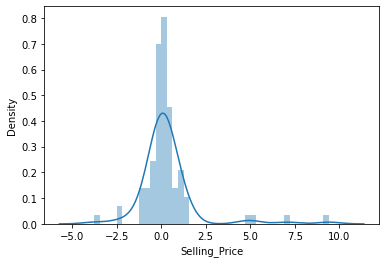

In [62]:
sns.distplot(ytest - prediction)

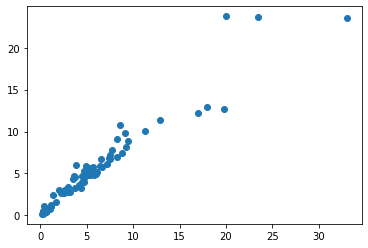

In [63]:
plt.scatter(ytest, prediction)

#### pickle

In [64]:
import pickle
file = open('random_forest_regressor.pkl','wb')

# dumping model to file
pickle.dump(rf_model, file)

#### Evaluation metrics

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
print('MAE', mean_absolute_error(ytest,prediction))
print('MSE',mean_squared_error(ytest,prediction))
print('RMSE', np.sqrt(mean_squared_error(ytest,prediction)))

MAE 0.7770296547675464
MSE 2.643958635306028
RMSE 1.6260254104121583


#### linear regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()

In [70]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [72]:
lprediction = lr.predict(xtest)

In [73]:
print('MAE', mean_absolute_error(ytest,lprediction))
print('MSE',mean_squared_error(ytest,lprediction))
print('RMSE', np.sqrt(mean_squared_error(ytest,lprediction)))

MAE 1.242671391503371
MSE 4.432128265667619
RMSE 2.1052620420431323


#### Ada boost regressor

In [74]:
from sklearn.ensemble import AdaBoostRegressor

In [75]:
ad = AdaBoostRegressor()

In [76]:
ad.fit(xtrain,ytrain)

AdaBoostRegressor()

In [77]:
aprediction = ad.predict(xtest)

In [79]:
print('MAE', mean_absolute_error(ytest,aprediction))
print('MSE',mean_squared_error(ytest,aprediction))
print('RMSE', np.sqrt(mean_squared_error(ytest,aprediction)))

MAE 1.027435479252184
MSE 3.301014226396337
RMSE 1.8168693476406985


In [80]:
#### gradient boost regressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
gb = GradientBoostingRegressor()
gb.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [83]:
gprediction = gb.predict(xtest)

In [84]:
print('MAE', mean_absolute_error(ytest,gprediction))
print('MSE',mean_squared_error(ytest,gprediction))
print('RMSE', np.sqrt(mean_squared_error(ytest,gprediction)))

MAE 0.751986080221022
MSE 2.3777489715143707
RMSE 1.5419951269424852


#### model comparison

In [85]:
models = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]

In [87]:
score = []
for i in models:
    model = i
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    score.append(mean_absolute_error(ytest,pred))
    score.append(mean_squared_error(ytest,pred))
    score.append(np.sqrt(mean_squared_error(ytest,pred)))

In [88]:
score

[1.242671391503371,
 4.432128265667619,
 2.1052620420431323,
 0.7714076923076925,
 2.542484252197801,
 1.5945169338071643,
 0.754718652778074,
 2.382801949637417,
 1.543632712026218,
 1.0370733726436472,
 3.4663570745463153,
 1.8618155318254048]

In [90]:
score_mat = np.array(score).reshape(4,3)

In [91]:
pd.DataFrame(score_mat,index =['Linear Regression','Random Forest Regression', 'Gradient boosting regression', 
          'Adaboost Regression'], columns = ['MAE','MSE','RMSE'] )

,MAE,MSE,RMSE
Linear Regression,1.242671,4.432128,2.105262
Random Forest Regression,0.771408,2.542484,1.594517
Gradient boosting regression,0.754719,2.382802,1.543633
Adaboost Regression,1.037073,3.466357,1.861816


In [92]:
# Gradient boosting regression achieves better metrics

#### Gradient boosting prediction plot

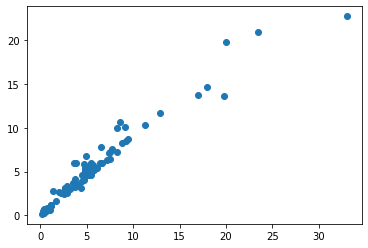

In [94]:
plt.scatter(ytest,gprediction)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

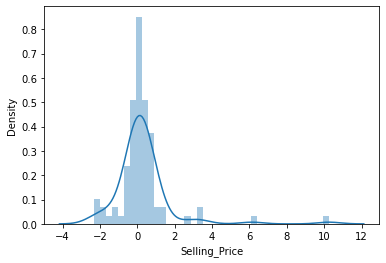

In [96]:
sns.distplot(ytest-gprediction)